# Introduction to Machine Learning

## Supervised methods - Support Vector Machines

Text(0.5, 1.0, 'Toy Problem')

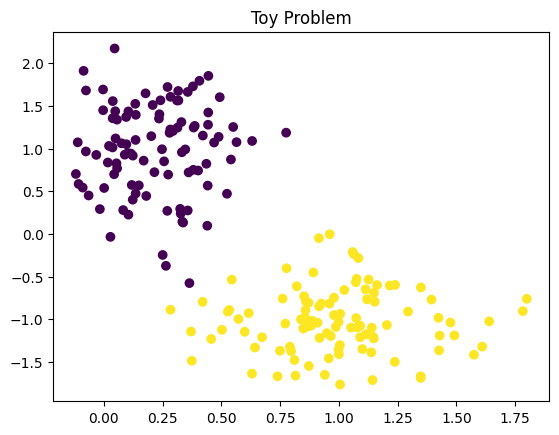

In [1]:
#Generate some random data

import numpy as np
import matplotlib.pyplot as plt

X1 = 0.2 + 0.2*np.random.randn(100)
Y1 = 1 + 0.5*np.random.randn(100)

X2 = 1 + 0.3*np.random.randn(100)
Y2 = -1 + 0.4*np.random.randn(100)

class_1 = np.vstack((X1,Y1))
class_2 = np.vstack((X2,Y2))

labels = np.zeros(shape = (class_1.shape[1]+class_2.shape[1]))

#Create a labels vector
labels[:class_1.shape[1]] = 0
labels[class_1.shape[1]:] = 1

all_points = np.hstack((class_1,class_2)) #join all the points together

#Plot it
fig, axes = plt.subplots()
axes.scatter(all_points[0,:], all_points[1,:], c = labels)
axes.set_title('Toy Problem')

In [2]:
#We first need to split the data into a set for training and a set for testing. 
#We can do this using the method train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_points.T, labels, test_size=0.25, shuffle = True)

In [3]:
#Let's train an SVM classifier
from sklearn.svm import SVC

C = 1.0 #tradeoff between maximizing the margin vs. mis-classification
        #Making this higher favors smaller margins for reduced mis-classification
    
svc = SVC(kernel='poly')
#Fit it to the training data
svc.fit(X_train, y_train)

#Now let's test the classifier
y_pred = svc.predict(X_test)
#Score it
score = svc.score(X_test,y_test)
print('Score: ' + str(score))

Score: 1.0


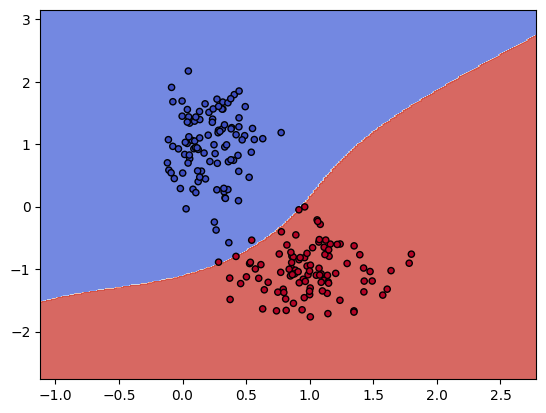

In [4]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


xx, yy = make_meshgrid(all_points[0,:], all_points[1,:])

fig, axes = plt.subplots()

plot_contours(axes, svc, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
axes.scatter(all_points[0,:], all_points[1,:], c=labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [5]:
#1. change C and observe how teh decision boundary changes
#2. Simulate more noisy data and observe whether changing the kernel can help you
#3. Try this on your own dataset.



In [6]:
#Decision tree classifier
#This time, we import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#Use entropy as the criterion
dtc = DecisionTreeClassifier(criterion = 'entropy')

#Fit to the training data
dtc.fit(all_points.T, labels)

#Score it
score = dtc.score(X_test, y_test)
print(score)

1.0


Text(0.5, 1.0, 'Decision Tree Surface')

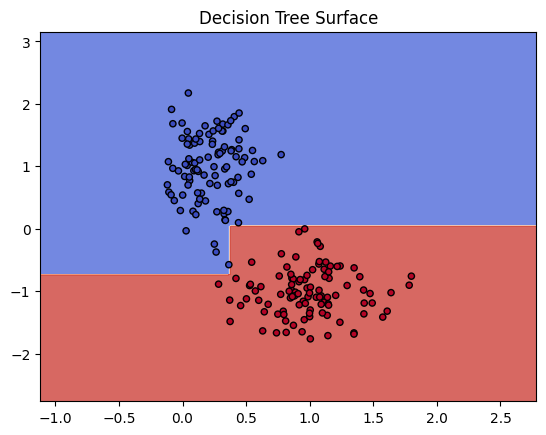

In [7]:
#Now let's plot the decision surface

fig, axes = plt.subplots()

plot_contours(axes, dtc, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
axes.scatter(all_points[0,:], all_points[1,:], c=labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
axes.set_title('Decision Tree Surface')

In [14]:
#We can visualize the decision tree using some viz packages. 
dtc.feature_importances_


array([0.10425236, 0.89574764])

In [34]:
#DO k-means clustering

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2) #number of clusters
km.fit(all_points.T)

KMeans(n_clusters=2)

In [35]:
cluster_centers = km.cluster_centers_
km_labels = km.labels_

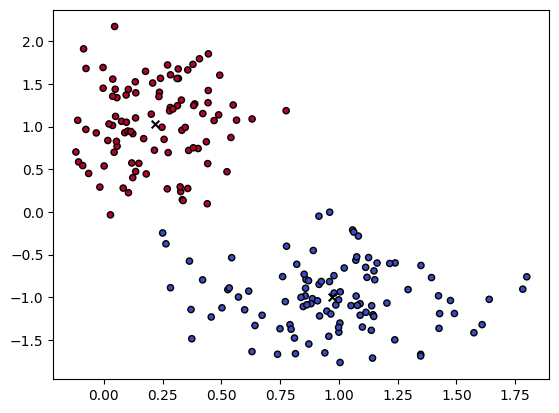

In [36]:
fig, axes = plt.subplots()
axes.scatter(all_points[0,:], all_points[1,:], c=km_labels, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
axes.scatter(cluster_centers[:,0], cluster_centers[:,1], marker = 'x', facecolor = 'k', s=30)

In [30]:
#Try with different numbers of clusters. What happens?